# Exercise 4

In this exercise, you will learn to solve linear regression problem by using the so-called gradient descent algorithm. You will see how the step size (or the learning rate) influences the convergence of the algorithm. **Read all the instructions carefully and complete the missing code**.

In [1]:
# First we import some useful packages. Don't import any other package.
import numpy as np
import matplotlib.pyplot as plt

### Optimization Problem

Given $ A \in \mathbb{R}^{M \times N}, b \in \mathbb{R}^M $, the Least Squares problem is given by:
$$ \min_{x \in \mathbb{R}^N} f(x)\,, \quad f(x):= \frac{1}{2} \Vert Ax - b \Vert_{2} ^2 $$
Also called Linear Regression Problem in Machine Learning, the problem is used, for instance, for curve fitting.

To track the progress of the algorithm over time, we should be able to obtain $ f(x) $ for a given $ x \in \mathbb{R}^N $.
#### Task 1: Complete the code below. (1 point)

In [2]:
# To compute the value of the objective, we implement the following python function.
def objective(x, A, b):
    """
    Compute the value of the objective function.
    """
    residual = A @ x - b
    return 0.5 * np.dot(residual, residual)

### Gradient of the objective
For gradient-based optimization algorithms (also called first-order methods), it is necessary to compute $ \nabla f $, the gradient of the objective function $ f $.
#### Task 2: Complete the code below. (1 point)

In [3]:
# To compute the gradient of the objective, we implement the following python function.
def gradient(x, A, b):
    """
    Compute the gradient of the objective function.
    """

    # Compute the gradient
    return A.T @ (A @ x - b)


### Expression for the Solution

The above problem is always guaranteed to have a solution which can be obtained by solving the optimality condition $\nabla f(x) = 0$ with respect to $x$. This leads to a linear system of equations.
#### Task 3: Write down the solution here and complete the code below. (3 points)

In [4]:
def minimizer(A, b):
    """
    Solve the minimazation problem
    """
    return np.linalg.solve(A.T @ A, A.T @ b)

### Gradient Descent Algorithm

Now we are ready to implement the algorithm. The update step of gradient descent is given for $ k \geq 0 $:
$$ x^{(k+1)} \leftarrow x^{(k)} - \alpha \nabla f(x^{(k)}) $$
where $ x^{(0)} \in \mathbb{R}^N $ is the given initialization and $ \alpha > 0 $ is a carefully chosen step size. Normally the algorithm is run for a large number of iterations until a stopping criterion is met. However, we will content ourselves by running it for a fixed number of iterations.

In [5]:
# Following runs gradient descent algorithm for fixed number of 'max_iters' steps.
def gradient_descent(x0, A, b, alpha, max_iters):
    x = np.zeros((max_iters+1, A.shape[1]))
    x[0] = x0
    for k in range(max_iters):
        x[k+1] = x[k] - alpha * gradient(x[k], A, b)
    return x

### Initializing some Problem Instances

To study the working of the algorithm, we set $N=2$ and consider three different instances of the problem, which are given by triple $(A, b, x^{(0)})$.

In [10]:
instances = [
    (np.stack((np.array([1, 2, 3]), np.array([3, 2, 1])), 1) / 3, 
     np.array([1, 3, 1]), np.array([1.2, 0.8])),
    
    (np.stack((np.array([1, 2, 3]), np.array([3, 2, 1]) ** 2), 1) / 3, 
     np.array([1, 3, 1]), np.array([2.1, -0.1])),
    
    (np.stack((np.array([1, 2, 3]), np.array([1, 2, 3]) ** 2), 1) / 3, 
     np.array([1, 3, 1]), np.array([8, -2.5])),
]

## Testing the Algorithm

For each triple $ (A, b, x^{(0)}) $ in *instances* (the list initialized above), run the algorithm for 5 iterations with $ \alpha = 0.1 $ and create a figure showing the level curves of the objective and the progress of the algorithm. Also show $ x^* $ and $ x^{(0)} $ in the plot. You can make use of *contour* and *quiver* functions of matplotlib.pyplot for this task. For *contour*, set *levels=20* and for *quiver*, set *angles='xy'*, *scale_units='xy'* and *scale=1*. You may find *plt.axis("equal")* command useful for making the axes scales equal. You should make sure that all the iterates and the solution of the problem lie inside the figure.
#### Task 4: Complete your code below. (6 points)

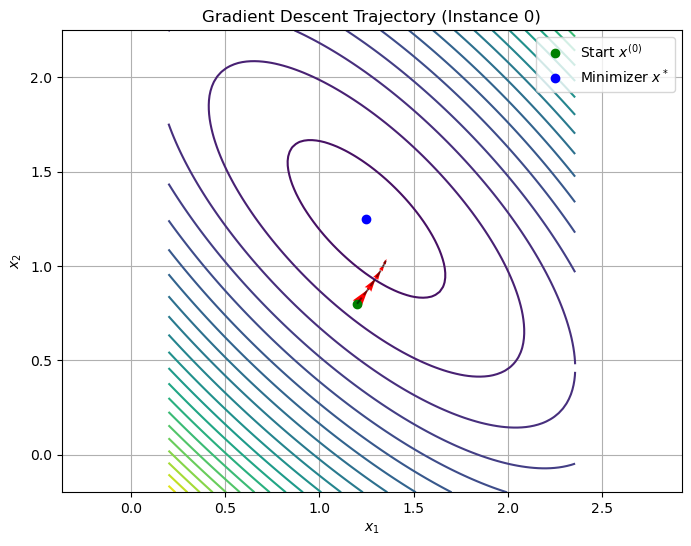

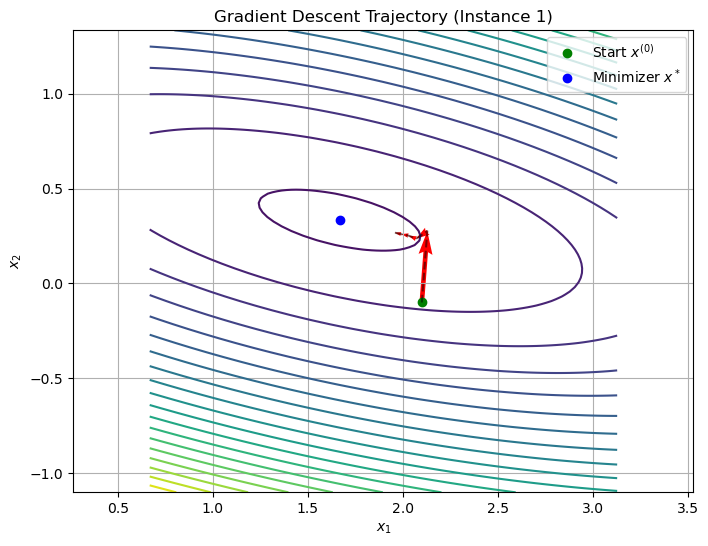

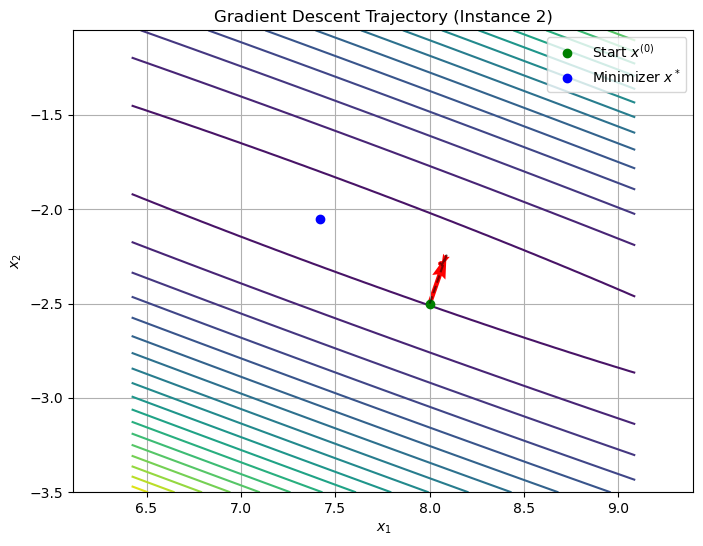

In [11]:
for idx, (A, b, x0) in enumerate(instances):
    alpha = 0.1
    max_iters = 5
    traj = gradient_descent(x0, A, b, alpha, max_iters)
    x_star = minimizer(A, b)

    # Create a meshgrid for plotting level curves
    x_vals = np.linspace(min(traj[:,0].min(), x_star[0]) - 1, max(traj[:,0].max(), x_star[0]) + 1, 100)
    y_vals = np.linspace(min(traj[:,1].min(), x_star[1]) - 1, max(traj[:,1].max(), x_star[1]) + 1, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)

    # Compute objective value for each point on the grid
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = objective(x_point, A, b)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=20)
    plt.quiver(traj[:-1,0], traj[:-1,1], traj[1:,0]-traj[:-1,0], traj[1:,1]-traj[:-1,1], 
               angles='xy', scale_units='xy', scale=1, color='r')
    plt.plot(x0[0], x0[1], 'go', label='Start $x^{(0)}$')
    plt.plot(x_star[0], x_star[1], 'bo', label='Minimizer $x^*$')
    plt.plot(traj[:,0], traj[:,1], 'k--', alpha=0.5)

    plt.title(f'Gradient Descent Trajectory (Instance {idx})')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

### Step Size Tuning
As you may already see from the figures, $ \alpha = 0.1 $ is not a very good choice for the step size. You need to hand-tune it to find the best value of the step size for any of the problems. That is, the one which brings the final iterate $ x^{(5)} $ as close to the solution as possible. We will call it $ \tilde{\alpha}_{i} $, where $ i \in \{ 0, 1, 2 \} $ corresponds to one of the three problem instances.

#### Task 5: Find the approximate value (round to three decimal places) of $ \tilde{\alpha}_{0}, \tilde{\alpha}_{1} $ and $ \tilde{\alpha}_{2} $. (2 + 2 + 2 points)

$ (\tilde{\alpha}_{0}, \tilde{\alpha}_{1}, \tilde{\alpha}_{2}) = (0.590, 0.150, 0.140) $

In [12]:
def best_alpha_for_instance(A, b, x0):
    x_star = minimizer(A, b)
    best_alpha = None
    min_dist = float('inf')
    best_final_x = None

    for alpha in np.linspace(0.01, 1.0, 100):
        traj = gradient_descent(x0, A, b, alpha, 5)
        final_x = traj[-1]
        dist = np.linalg.norm(final_x - x_star)

        if dist < min_dist:
            min_dist = dist
            best_alpha = alpha
            best_final_x = final_x

    return round(best_alpha, 3), min_dist

alphas = []
for A, b, x0 in instances:
    alpha, dist = best_alpha_for_instance(A, b, x0)
    alphas.append(alpha)
    print(f"Best alpha: {alpha} (distance to optimal = {dist:.5f})")

Best alpha: 0.59 (distance to optimal = 0.06559)
Best alpha: 0.15 (distance to optimal = 0.22694)
Best alpha: 0.14 (distance to optimal = 0.66349)


### Observations

Go to the code you wrote for Task 4 and for each problem instance, set $ \alpha $ to the corresponding step size you obtained in Task 5. Now run the code again and have a look at the three figures which should correspond to the best value of the step size chosen by you.
#### Task 6: Answer the following questions. (1 + 2 points)
* What do you see? State the comparison among the three figures.
    * When $ \alpha $ = 0.14, step size are very small and there is still a distance between minimizer. The algorithm is not efficient after 5 iterations.
    * When $ \alpha $ = 0.15, the algorithm approaches better than $ \alpha $ = 0.14, but it still didn't get close minimzer.
    * When $ \alpha $ = 0.59, the algorithm almost close to minimizer. It's the best compared to others after 5 iterations.

* Is there a difference in the figures? If yes, try to explain which quantity among $ A, b $ and $ x^{(0)} $ causes the difference and how?
    * Yes, there is. When $ A $ is balanced, we can see the curls forming better (figure below 1,2) however, when it's not the curls didn't form at all and we see lines instead of ellipses. So when $ A $  is not balanced, the gradient descent becomes less efficient.
    * $ x^{(0)} $ is the start point, if we start too far away then it'll take longer for algorithm to find the solution.
    * $ b $ determines the position where minimum solution is. But it doesn't effect the shape of gradients like $ A $.

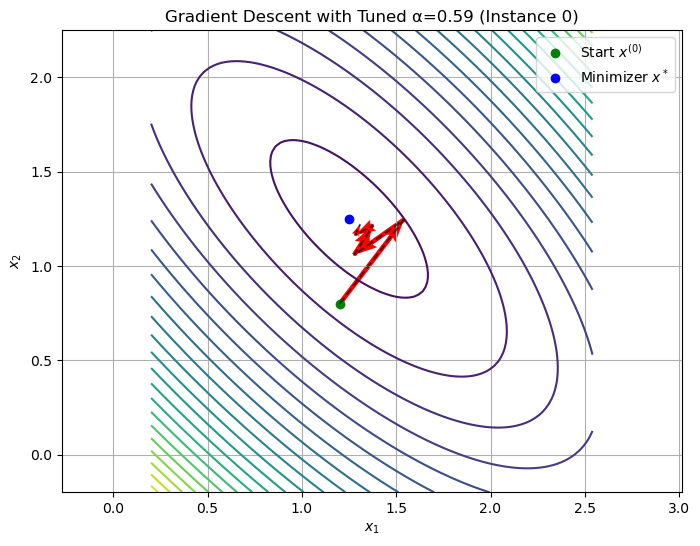

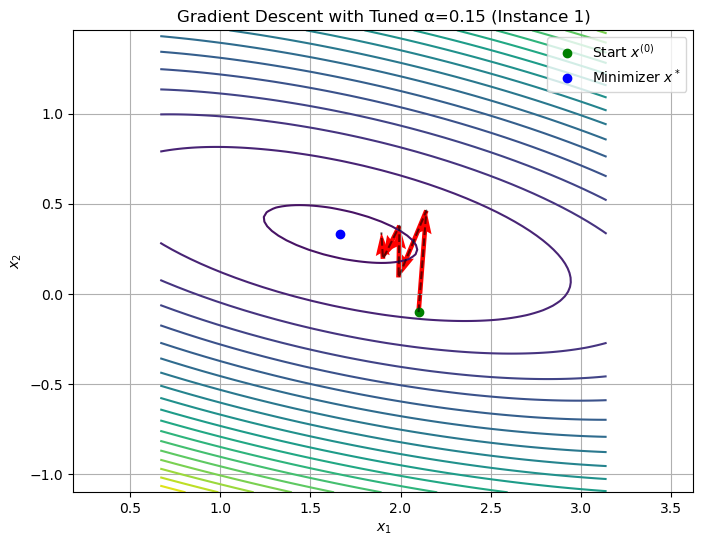

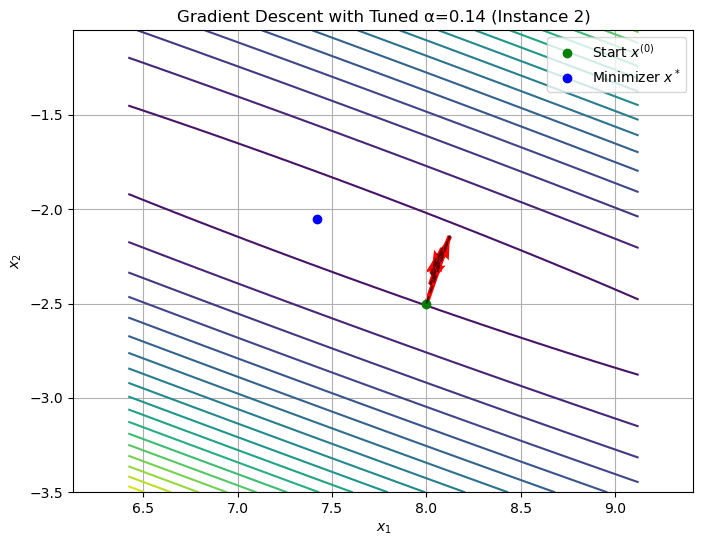

In [13]:
# Tuned step sizes for each instance (from Task 5)
tuned_alphas = [0.59, 0.15, 0.14]

for idx, (A, b, x0) in enumerate(instances):
    alpha = tuned_alphas[idx]
    max_iters = 5
    traj = gradient_descent(x0, A, b, alpha, max_iters)
    x_star = minimizer(A, b)

    # Create a meshgrid for level curves
    x_vals = np.linspace(min(traj[:,0].min(), x_star[0]) - 1, max(traj[:,0].max(), x_star[0]) + 1, 100)
    y_vals = np.linspace(min(traj[:,1].min(), x_star[1]) - 1, max(traj[:,1].max(), x_star[1]) + 1, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)

    # Evaluate objective at each point on the grid
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x_point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = objective(x_point, A, b)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=20)
    plt.quiver(traj[:-1,0], traj[:-1,1], traj[1:,0]-traj[:-1,0], traj[1:,1]-traj[:-1,1],
               angles='xy', scale_units='xy', scale=1, color='r')
    plt.plot(x0[0], x0[1], 'go', label='Start $x^{(0)}$')
    plt.plot(x_star[0], x_star[1], 'bo', label='Minimizer $x^*$')
    plt.plot(traj[:,0], traj[:,1], 'k--', alpha=0.6)

    plt.title(f'Gradient Descent with Tuned α={alpha} (Instance {idx})')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()